# EDA of Review Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

/Users/emilyguan/miniforge3/envs/ir2024/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_basic_info(review_dataset, meta_dataset):
    '''@param review_dataset, meta_dataset: type 'datasets.arrow_dataset.Dataset'''
    print(f"Tot number of reviews", len(review_dataset))
    print("Columns in metadata:", meta_dataset.column_names)

    categories_col = meta_dataset['categories']
    all_categories = [category for sublist in categories_col for category in sublist]
    unique_categories_set = set(all_categories)
    print("Number of categories:", len(unique_categories_set))
    print("Unique categories:", unique_categories_set)

In [4]:
handmade_reviews_all = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Handmade_Products",  split="full", trust_remote_code=True)
handmade_meta_all = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Handmade_Products", split="full", trust_remote_code=True)

get_basic_info(handmade_reviews_all, handmade_meta_all)

Tot number of reviews 664162
Columns in metadata: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author']
Number of categories: 646
Unique categories: {'Terrariums', 'Featured Artisans', 'Eau de Parfum', 'Toe Rings', 'Bowls', 'Bath & Bathing Accessories', 'Barbells', 'Baby Girls', 'Storage Boxes & Chests', 'Bracelets', 'Outdoor Décor', 'Body Jewelry', 'Two Pieces', 'Beds & Furniture', 'Photo Albums', 'Cloths & Sponges', 'Patio, Lawn & Garden', 'Garters', 'Charm', 'Cupcake Wrappers', 'Jewelry', 'Keychains & Keyrings', 'Sleeves', 'Pacifiers & Teethers', 'Lighting', 'Grave Markers', 'Home Bar Furniture', 'Travel Accessories', 'Kids & Baby Gifts', 'Shoes', 'Glassware', 'Bedside & Table Lamps', 'Decorative Stones', 'Bottle Stoppers', 'Bedroom Furniture', 'Beer Glasses', 'Pet Collars', 'Tunics', 'Bottoms', 'Baby Boys', 'Dolls, Toy Figures & A

In [15]:
reviews_handmade = pd.read_csv('handmade_reviews.csv')  # with > 5 reviews
print(len(reviews_handmade))
reviews_handmade.head()
# reviews_handmade.to_csv('handmade_reviews.csv', index=False)

161979


,Unnamed: 0.1,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,index
0,0,5.0,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,1621607495111,1,True,0
1,1,5.0,Well made and so beautiful,"This is beyond beautiful. So shiny, the size ...",[],B071ZMDK26,B071ZMDK26,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1559438079784,2,True,1
2,2,5.0,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,[],B01MPVZ4YP,B01MPVZ4YP,AGCPAPUHXYA3EEIL2KGSQTGO5HRA,1546906331674,1,True,2
3,3,5.0,Set of 2 Fair Trade bracelets,I purchased about 5 different color combos of ...,[],B0855GMD9K,B0855GMD9K,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1607109316926,7,True,3
4,4,5.0,Love it!,Came out so good! Will buy again in the future,[],B096G3MQMS,B09GK2JJDZ,AF2FTNKCY6XY67BKBUO4BNJRZ4XQ,1669860506507,0,True,4


Look at distribution of # reviews per product

In [13]:
def get_most_reviewed_prods(reviews_df, least_reviewed=False):
    ''' 
    Get most reviewed products and their counts (# reviews).
    If least_reviewed=True, get least reviewed products.
    @param reviews_df: pandas DataFrame with reviews
    '''
    print(f"Number of reviews: {reviews_df.shape[0]}")
    review_counts = reviews_df.groupby(['parent_asin']).agg({'text':'count'}).sort_values(by='text', ascending=least_reviewed)
    review_counts = review_counts.reset_index()
    review_counts = review_counts.rename({'text':'numb_of_revs'}, axis='columns')
    print(f"Number of unique reviews: {review_counts.shape[0]}")
    k = 10
    print(f'Top {k} reviewed:\n', review_counts.head(k),'\n')
    print(review_counts['numb_of_revs'].describe())

In [14]:
get_most_reviewed_prods(reviews_handmade, least_reviewed=True)

Number of reviews: 161979
Number of unique reviews: 1376
Top 10 reviewed:
   parent_asin  numb_of_revs
0  B01I8XISM2            49
1  B076566WZP            50
2  B01M333BMQ            50
3  B09MG1S9NB            50
4  B09M2VY4VG            50
5  B01AIISZZK            50
6  B01MR74VXZ            50
7  B07V37D7YK            50
8  B0BMZ3B3KS            50
9  B07BH69XN2            50 

count    1376.000000
mean      117.670785
std       127.303977
min        49.000000
25%        62.000000
50%        81.000000
75%       125.000000
max      2498.000000
Name: numb_of_revs, dtype: float64


Total number of reviews: 161979


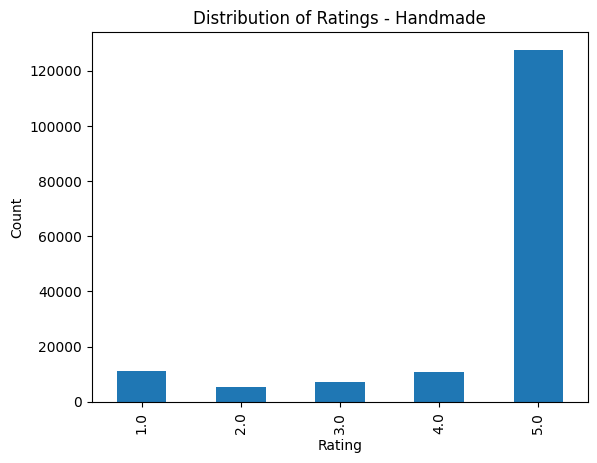

In [16]:
# Distribution of ratings 
print(f"Total number of reviews: {len(reviews_handmade)}")
reviews_handmade['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings - Handmade')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are heavily skewed towards 5-star ratings, so we balance the dataset.

In [81]:
def balance_by_rating(reviews, filename_write=None):
    '''
    Balance the reviews by rating, so that there are equal number of reviews for each rating.
    @param reviews: df of reviews
    @param rating_col: column name for the ratings
    '''
    # Get the number of reviews for each rating
    rating_counts = reviews['rating'].value_counts()
    min_rating_count = rating_counts.min()
    print(f"Min rating count: {min_rating_count}")
    balanced_reviews = pd.DataFrame()
    for rating in rating_counts.index:
        rating_reviews = reviews[reviews['rating'] == rating].sample(n=min_rating_count)
        balanced_reviews = pd.concat([balanced_reviews, rating_reviews])
    if filename_write:
        balanced_reviews.to_csv(filename_write, index=False)
    return balanced_reviews

In [ ]:
proc_reviews_df = pd.read_csv('handmade_reviews_processed.csv')
# Balance the reviews by rating
balance_by_rating(proc_reviews_df, filename_write='handmade_reviews_balanced.csv')

Total number of reviews: 26236


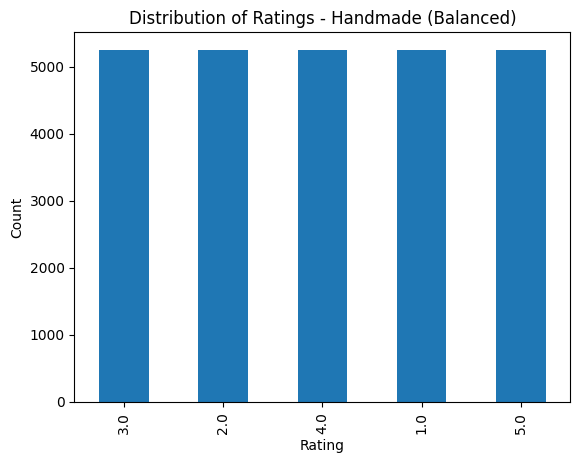

In [87]:
# After balancing
handmade_balanced = pd.read_csv('handmade_reviews_balanced.csv').dropna(subset=['text'])
print(f"Total number of reviews: {len(handmade_balanced)}")
handmade_balanced['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings - Handmade (Balanced)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [84]:
get_most_reviewed_prods(handmade_balanced, least_reviewed=True)

Number of reviews: 26335
Number of unique reviews: 1375
Top 10 most reviewed:
   parent_asin  numb_of_revs
0  B07NPYGTDQ             1
1  B01M7XCUNS             1
2  B084KKY1NG             1
3  B0BH9F6JXC             1
4  B074CFZ4MZ             1
5  B073Z4FWYZ             1
6  B078DZQ8PP             1
7  B01CB0X6KC             1
8  B0933GS1V6             1
9  B07YM2CTVD             1 

count    1375.000000
mean       19.080727
std        25.274620
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max       328.000000
Name: numb_of_revs, dtype: float64


# Feature Properties

In [59]:
handmade_features = pd.read_csv('handmade_nouns_spacy.csv')
handmade_features = handmade_features.rename(columns = {'Unnamed: 0':'noun'})
print(f"Total number of nouns: {len(handmade_features)}")
print(f"Number nouns with freq=1: {len(handmade_features[handmade_features['count'] == 1])}")
print(f"Number nouns with freq<5: {len(handmade_features[handmade_features['count'] < 5])}")


# Filter df to only have nouns with > k occurrences
k = 100
handmade_features_filt = handmade_features[handmade_features['count'] > k]
print(f"Length of features with freq > {k}: {len(handmade_features_filt)}")
handmade_features_filt.head()

Total number of nouns: 7235
Number nouns with freq=1: 3483
Number nouns with freq<5: 5166
Length of features with freq > 100: 272


,noun,count
0,love,3224
1,gift,2703
2,quality,2437
3,product,2357
4,order,2133


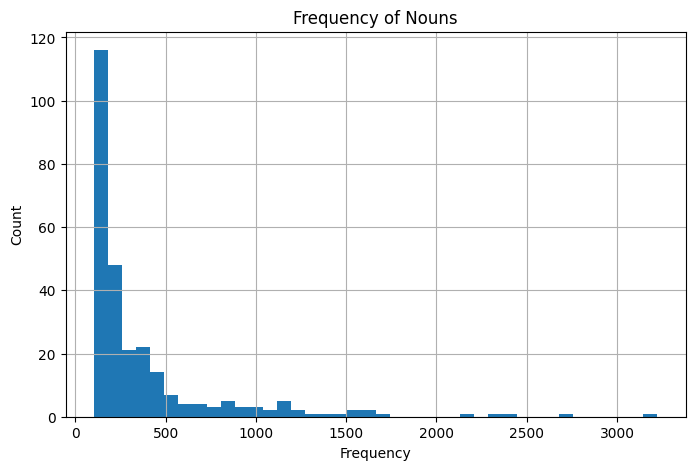

In [60]:
# Histogram of noun frequencies > 100 
plt.figure(figsize=(8, 5))
plt.hist(handmade_features_filt['count'], bins='auto') 
plt.title('Frequency of Nouns')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

267


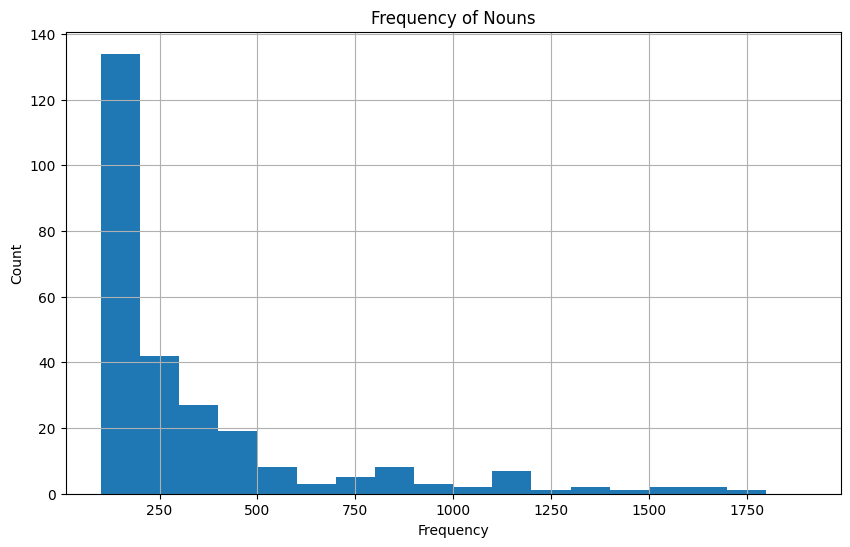

In [61]:
# Create df with features between freuqncy 100-2000
handmade_features_midrange = handmade_features_filt[handmade_features_filt['count'] < 2000]
print(len(handmade_features_midrange)) 
# Histogram of noun frequencies 
plt.figure(figsize=(10, 6))
plt.hist(handmade_features_midrange['count'], bins=np.arange(100, 2000, 100))
plt.title('Frequency of Nouns')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()